In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, multivariate_normal
from scipy import linalg

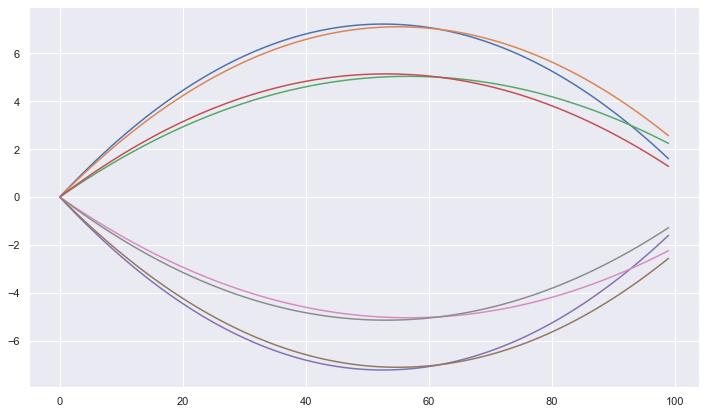

In [348]:
obs_x0 = np.loadtxt("./obs-x0.txt",skiprows=0).reshape(100,1)
obs_x1 = np.loadtxt("./obs-x1.txt",skiprows=0).reshape(100,1)
obs_x2 = np.loadtxt("./obs-x2.txt",skiprows=0).reshape(100,1)
obs_x3 = np.loadtxt("./obs-x3.txt",skiprows=0).reshape(100,1)
obs_x4 = np.loadtxt("./obs-x4.txt",skiprows=0).reshape(100,1)
obs_x5 = np.loadtxt("./obs-x5.txt",skiprows=0).reshape(100,1)
obs_x6 = np.loadtxt("./obs-x6.txt",skiprows=0).reshape(100,1)
obs_x7 = np.loadtxt("./obs-x7.txt",skiprows=0).reshape(100,1)

#just for the demo
data_demo = np.concatenate((obs_x0,obs_x1,obs_x2,obs_x3,obs_x4,obs_x5,obs_x6,obs_x7), axis=1)

ob0= np.concatenate((np.arange(start=0, stop=100).reshape(100,1),obs_x0),axis =1)

ob1= np.concatenate((np.arange(start=0, stop=100).reshape(100,1),obs_x1),axis =1)

ob2= np.concatenate((np.arange(start=0, stop=100).reshape(100,1),obs_x2),axis =1)

ob3= np.concatenate((np.arange(start=0, stop=100).reshape(100,1),obs_x3),axis =1)

ob4= np.concatenate((np.arange(start=0, stop=100).reshape(100,1),obs_x4),axis =1)

ob5= np.concatenate((np.arange(start=0, stop=100).reshape(100,1),obs_x5),axis =1)

ob6= np.concatenate((np.arange(start=0, stop=100).reshape(100,1),obs_x6),axis =1)

ob7= np.concatenate((np.arange(start=0, stop=100).reshape(100,1),obs_x7),axis =1)

#data that will be used for gmm implementation
data = np.concatenate((ob0,ob1,ob2,ob3,ob4,ob5,ob6,ob7),axis = 0)



plt.figure(figsize=(12,7))
plt.plot(data_demo)
#plt.savefig('Trajectories.png')
plt.show()

In [324]:
#Gaussian Mixture Model with 8 gaussians
gmm8 = GaussianMixture(n_components = 8, covariance_type = 'full', 
                      max_iter = 100,  random_state = 4)
#fitting the data
gmm8.fit(data)
#check whether it is converged or not
print('converged or not: ', gmm8.converged_)

converged or not:  True


In [325]:
#Gaussian Mixture Model with 16 gaussians
gmm16 = GaussianMixture(n_components = 16, covariance_type = 'full', 
                      max_iter = 100,  random_state = 4)
#fitting the data
gmm16.fit(data)
#check whether it is converged or not
print('converged or not: ', gmm16.converged_)

converged or not:  True


In [349]:
#plotting the data and the gaussian contours that gmm fits
#I have got the help from http://ethen8181.github.io/machine-learning/clustering/GMM/GMM.html 
#for plotting the contours of gaussians
def plot_contours(data, means, covs, title):
    plt.figure(figsize=(12,7))
    plt.plot(data,color= 'black')

    
    
    delta = 0.025
    k = means.shape[0]
    x = np.linspace(0, 100, 100)
    y = np.linspace(-20, 20, 100)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

    for i in range(k):
        rgb = np.random.rand(3,)
        mean = means[i]
        cov = covs[i]
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
        plt.contour(x_grid, y_grid, z_grid, colors = [rgb], extend='both')
    
    #plt.savefig(title + '.png')
    plt.title(title)
    plt.tight_layout()

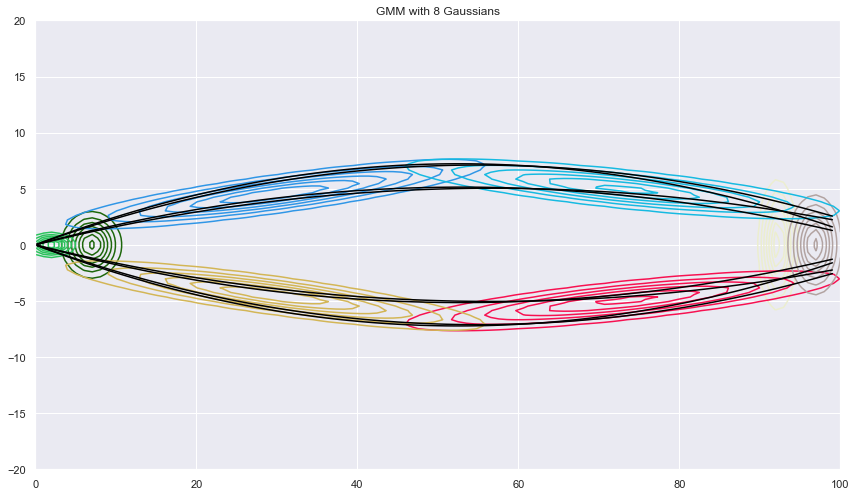

In [341]:
#plotting data and gaussians contours with 8 
plot_contours(data_demo,gmm8.means_,gmm8.covariances_,"GMM with 8 Gaussians")


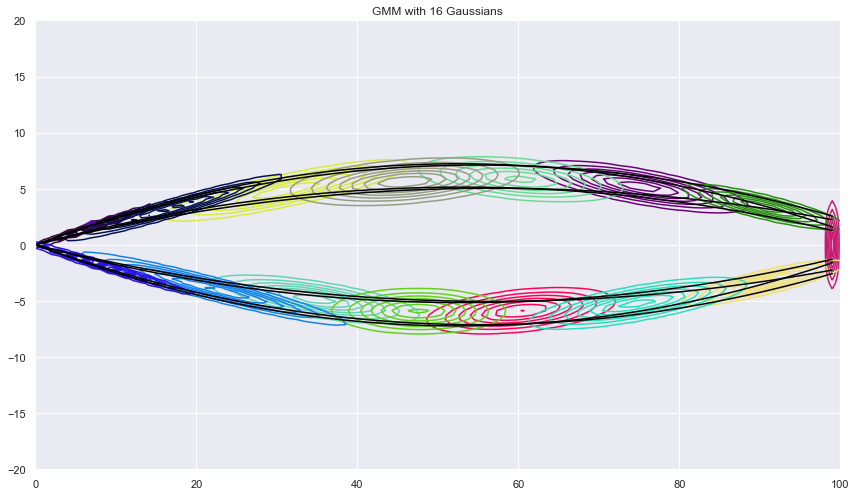

In [344]:
#plotting data and gaussians contours with 16
plot_contours(data_demo,gmm16.means_,gmm16.covariances_,"GMM with 16 Gaussians")

